In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
#as age cannot be in float
for i in train['Age']:
    train['Age']=round(train['Age'])

In [8]:
train[train['Age']<10].sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S


In [9]:
#childrens less than 16 yers old can not travell alone
train[(train['Age']<16) & (train['SibSp']==0) & (train['Parch']==0)] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


In [10]:
train[(train['Age']<16) & (train['SibSp']==0) & (train['Parch']==0)].index

Int64Index([14, 22, 731, 777, 780, 875], dtype='int64')

In [11]:
train.drop(train.index[[14, 22, 731, 777, 780, 875]],inplace=True)

In [12]:
#childrens less than 16 yers old can not travell alone
test[(test['Age']<16) & (test['SibSp']==0) & (test['Parch']==0)] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.225,NaN,S
120,1012,2,"Watt, Miss. Bertha J",female,12.0,0,0,C.A. 33595,15.750,NaN,S
230,1122,2,"Sweet, Mr. George Frederick",male,14.0,0,0,220845,65.000,NaN,S


In [13]:
test[(test['Age']<16) & (test['SibSp']==0) & (test['Parch']==0)].index

Int64Index([5, 120, 230], dtype='int64')

In [14]:
#test.drop(test.index[[5, 120, 230]],inplace=True)

In [15]:
train['Fare'].describe()

count    885.000000
mean      32.352937
std       49.827586
min        0.000000
25%        7.925000
50%       14.458300
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [16]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [17]:
train[train['Fare']==0] #to be on board fare can not be zero!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [18]:
#to be on board fare can not be zero!

In [19]:
train[train['Fare']==0].index

Int64Index([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
            815, 822],
           dtype='int64')

In [20]:
test[test['Fare']==0].index

Int64Index([266, 372], dtype='int64')

In [21]:
train.drop(train.index[[179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
            815, 822]],inplace=True)

In [22]:
#test.drop(test.index[[266, 372]],inplace=True)

In [23]:
train.shape

(870, 12)

In [24]:
test.shape

(418, 11)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    870 non-null int64
Survived       870 non-null int64
Pclass         870 non-null int64
Name           870 non-null object
Sex            870 non-null object
Age            697 non-null float64
SibSp          870 non-null int64
Parch          870 non-null int64
Ticket         870 non-null object
Fare           870 non-null float64
Cabin          201 non-null object
Embarked       868 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 88.4+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
train['Family']=train['SibSp']+train['Parch']+1
test['Family']=test['SibSp']+test['Parch']+1

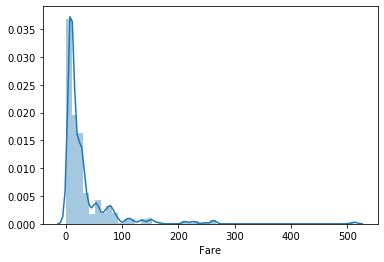

In [28]:
sns.distplot(train['Fare'])

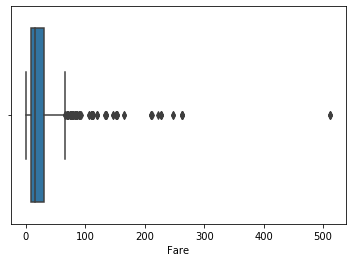

In [29]:
sns.boxplot(train['Fare'])

In [30]:
train['Fare'].describe()

count    870.000000
mean      32.499659
std       50.153601
min        0.000000
25%        7.895800
50%       14.456250
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [31]:
def fare_range(number):
    if number>0 and number <10:
        return ("poor") 
    elif number>=10 and number<=40:
        return ("middle_cast")
    elif number>40:
        return ('rich')
    else:
        return ("poor")

In [32]:
train['Family_status']=train['Fare'].apply(fare_range)

In [33]:
test['Family_status']=test['Fare'].apply(fare_range)

# Dropping not required columns

In [34]:
train.drop(columns=['PassengerId','Name','Ticket','Cabin','Fare'],inplace=True)

In [35]:
test.drop(columns=['Name','Ticket','Cabin','Fare'],inplace=True)

In [36]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [37]:
train.drop(columns='Family', inplace=True)

In [38]:
test.drop(columns='Family', inplace=True)

# Checking for missing values

In [39]:
train.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              173
Embarked           2
Family_status      0
dtype: int64

In [40]:
train['Embarked'].value_counts()

S    632
C    161
Q     75
Name: Embarked, dtype: int64

In [41]:
test.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age              86
Embarked          0
Family_status     0
dtype: int64

In [42]:
train['Age'].describe()

count    697.000000
mean      29.750359
std       14.456065
min        0.000000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [43]:
train[train['Age'].isnull()]

,Survived,Pclass,Sex,Age,Embarked,Family_status
5,0,3,male,NaN,Q,poor
17,1,2,male,NaN,S,middle_cast
19,1,3,female,NaN,C,poor
26,0,3,male,NaN,C,poor
28,1,3,female,NaN,Q,poor
...,...,...,...,...,...,...
859,0,3,male,NaN,C,poor
863,0,3,female,NaN,S,rich
868,0,3,male,NaN,S,poor
878,0,3,male,NaN,S,poor


In [44]:
train['Family_status'].value_counts()

middle_cast    369
poor           327
rich           174
Name: Family_status, dtype: int64

In [45]:
senior=round(train['Age'].quantile(.80))
young=round(train['Age'].mean())
child=round(train['Age'].std())

In [46]:
train[((train['Pclass']==1) & (train['Age'].isnull()))].shape

(30, 6)

In [47]:
gen_age=np.random.randint(senior-child,senior+child,size=30)

In [48]:
train['Age'][((train['Pclass']==1) & (train['Age'].isnull()))]=gen_age

C:\Users\tuhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
test[((test['Pclass']==1) & (test['Age'].isnull()))]['Age'].shape

(9,)

In [50]:
gen_age=np.random.randint(senior-child,senior+child,size=9)

In [51]:
test['Age'][((test['Pclass']==1) & (test['Age'].isnull()))]=gen_age

C:\Users\tuhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
train['Age'][((train['Pclass']==2) & (train['Age'].isnull()))].shape

(10,)

In [53]:
gen_age=np.random.randint(senior-child,young+child,size=10)

In [54]:
train['Age'][((train['Pclass']==2) & (train['Age'].isnull()))]=gen_age

C:\Users\tuhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
test[((test['Pclass']==2) & (test['Age'].isnull()))]['Age'].shape

(5,)

In [56]:
gen_age=np.random.randint(senior-child,young+child,size=5)

In [57]:
test['Age'][((test['Pclass']==2) & (test['Age'].isnull()))]=gen_age

C:\Users\tuhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
train['Age'][((train['Pclass']==3) & (train['Age'].isnull()))].shape

(133,)

In [59]:
gen_age=np.random.randint(young-child,young+child,size=133)

In [60]:
train['Age'][((train['Pclass']==3) & (train['Age'].isnull()))]=gen_age

C:\Users\tuhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
test[((test['Pclass']==3) & (test['Age'].isnull()))]['Age'].shape

(72,)

In [62]:
gen_age=np.random.randint(young-child,young+child,size=72)

In [63]:
test['Age'][((test['Pclass']==3) & (test['Age'].isnull()))]=gen_age

C:\Users\tuhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
train.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
Embarked         2
Family_status    0
dtype: int64

In [65]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,Embarked,Family_status
61,1,1,female,38.0,NaN,rich
829,1,1,female,62.0,NaN,rich


In [66]:
train=train.dropna()

In [67]:
train.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
Embarked         0
Family_status    0
dtype: int64

In [68]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
Embarked         0
Family_status    0
dtype: int64

In [69]:
train.shape

(868, 6)

In [70]:
test.shape

(418, 6)

In [71]:
#no more null value

In [72]:
train

,Survived,Pclass,Sex,Age,Embarked,Family_status
0,0,3,male,22.0,S,poor
1,1,1,female,38.0,C,rich
2,1,3,female,26.0,S,poor
3,1,1,female,35.0,S,rich
4,0,3,male,35.0,S,poor
...,...,...,...,...,...,...
886,0,2,male,27.0,S,middle_cast
887,1,1,female,19.0,S,middle_cast
888,0,3,female,34.0,S,middle_cast
889,1,1,male,26.0,C,middle_cast


In [73]:
test

,PassengerId,Pclass,Sex,Age,Embarked,Family_status
0,892,3,male,34.5,Q,poor
1,893,3,female,47.0,S,poor
2,894,2,male,62.0,Q,poor
3,895,3,male,27.0,S,poor
4,896,3,female,22.0,S,middle_cast
...,...,...,...,...,...,...
413,1305,3,male,28.0,S,poor
414,1306,1,female,39.0,C,rich
415,1307,3,male,38.5,S,poor
416,1308,3,male,34.0,S,poor


In [74]:
train['Sex'].replace('male','1',inplace=True)
train['Sex'].replace('female','0',inplace=True)

In [75]:
test['Sex'].replace('male','1',inplace=True)
test['Sex'].replace('female','0',inplace=True)

In [76]:
train

,Survived,Pclass,Sex,Age,Embarked,Family_status
0,0,3,1,22.0,S,poor
1,1,1,0,38.0,C,rich
2,1,3,0,26.0,S,poor
3,1,1,0,35.0,S,rich
4,0,3,1,35.0,S,poor
...,...,...,...,...,...,...
886,0,2,1,27.0,S,middle_cast
887,1,1,0,19.0,S,middle_cast
888,0,3,0,34.0,S,middle_cast
889,1,1,1,26.0,C,middle_cast


In [77]:
PassengerId=test['PassengerId'].values
PassengerId.shape

(418,)

In [78]:
test.drop(columns='PassengerId',inplace=True)

In [79]:
y=train['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [80]:
y.shape

(868,)

In [81]:
train.drop(columns='Survived', inplace=True)

In [82]:
train.shape

(868, 5)

In [83]:
test.shape

(418, 5)

In [84]:
train.columns.values

array(['Pclass', 'Sex', 'Age', 'Embarked', 'Family_status'], dtype=object)

In [85]:
final=train.append(test) #vertically merging train and test

In [86]:
final

,Pclass,Sex,Age,Embarked,Family_status
0,3,1,22.0,S,poor
1,1,0,38.0,C,rich
2,3,0,26.0,S,poor
3,1,0,35.0,S,rich
4,3,1,35.0,S,poor
...,...,...,...,...,...
413,3,1,28.0,S,poor
414,1,0,39.0,C,rich
415,3,1,38.5,S,poor
416,3,1,34.0,S,poor


In [87]:
final=pd.get_dummies(final, columns=['Pclass','Sex','Embarked','Family_status'],drop_first=True)

In [88]:
final

,Age,Pclass_2,Pclass_3,Sex_1,Embarked_Q,Embarked_S,Family_status_poor,Family_status_rich
0,22.0,0,1,1,0,1,1,0
1,38.0,0,0,0,0,0,0,1
2,26.0,0,1,0,0,1,1,0
3,35.0,0,0,0,0,1,0,1
4,35.0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...
413,28.0,0,1,1,0,1,1,0
414,39.0,0,0,0,0,0,0,1
415,38.5,0,1,1,0,1,1,0
416,34.0,0,1,1,0,1,1,0


In [89]:
final.shape

(1286, 8)

In [90]:
x_test=final.tail(418).values
x_test

array([[34.5,  0. ,  1. , ...,  0. ,  1. ,  0. ],
       [47. ,  0. ,  1. , ...,  1. ,  1. ,  0. ],
       [62. ,  1. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [38.5,  0. ,  1. , ...,  1. ,  1. ,  0. ],
       [34. ,  0. ,  1. , ...,  1. ,  1. ,  0. ],
       [29. ,  0. ,  1. , ...,  0. ,  0. ,  0. ]])

In [91]:
x=final.head(868).values
x

array([[22.,  0.,  1., ...,  1.,  1.,  0.],
       [38.,  0.,  0., ...,  0.,  0.,  1.],
       [26.,  0.,  1., ...,  1.,  1.,  0.],
       ...,
       [34.,  0.,  1., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  0.],
       [32.,  0.,  1., ...,  0.,  1.,  0.]])

In [92]:
x.shape

(868, 8)

In [93]:
y.shape

(868,)

In [94]:
#model

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.1)

# Decision Tree classifier

In [95]:
# decision_tree

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [96]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
Y_pred=clf.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred)

0.7816091954022989

In [99]:
# decision_tree

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

# 2. Fit
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
Y_pred=dtc.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred)

0.8160919540229885

In [101]:
#using grid to find the best hyperparameter of decision tree

In [102]:
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,8,None]
}

In [103]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_grid=param_dist, cv=10, n_jobs=-1)

In [104]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None]},
       

In [105]:
Y_pred=grid.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, Y_pred))

Accuracy: 0.8275862068965517


# Random forest Classifier

In [107]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [108]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7931034482758621


# KNN

In [109]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [110]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7701149425287356


# Naive Bayes

In [111]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [112]:
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 72.41379310344827


In [113]:
from sklearn.naive_bayes import MultinomialNB
mul = MultinomialNB()
mul.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [114]:
# making predictions on the testing set 
y_pred = mul.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Multinomial Naive Bayes model accuracy(in %): 70.11494252873564


In [115]:
from sklearn.naive_bayes import BernoulliNB
ber = BernoulliNB()
ber.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [116]:
# making predictions on the testing set 
y_pred = ber.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Bernoulli Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Bernoulli Naive Bayes model accuracy(in %): 73.5632183908046


In [117]:
ans=grid.predict(x_test)

In [118]:
submission2=pd.DataFrame()

In [119]:
submission2['PassengerId']=PassengerId
submission2['Survived']=ans

In [120]:
submission2.to_csv('submission3.csv', index=False)

In [121]:
submission2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
